# Statistik Raport
---

### Vi ska i raporten undersöka om mängden hästkrafter i amerikanska bilar skiljer sig från de europeisk bilarna.

**Vi börjar med att räkna ut medel mängden för hästkrafter för amerikanska och europeiska bilar.**

**Deta gör vi igenom att först dela upp datasetet i amerikanska och europeiska bilar.**

**och sen med hjälp av numpy räkna ut medlvärdet av varje typ.**

In [2]:
# importera dependences 
import pandas as pd
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt
import seaborn as sns

# filepath
file_path = "../Datasets/cars.csv"

# hämta datasetet.
df_cars = pd.read_csv(file_path)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


<AxesSubplot: >

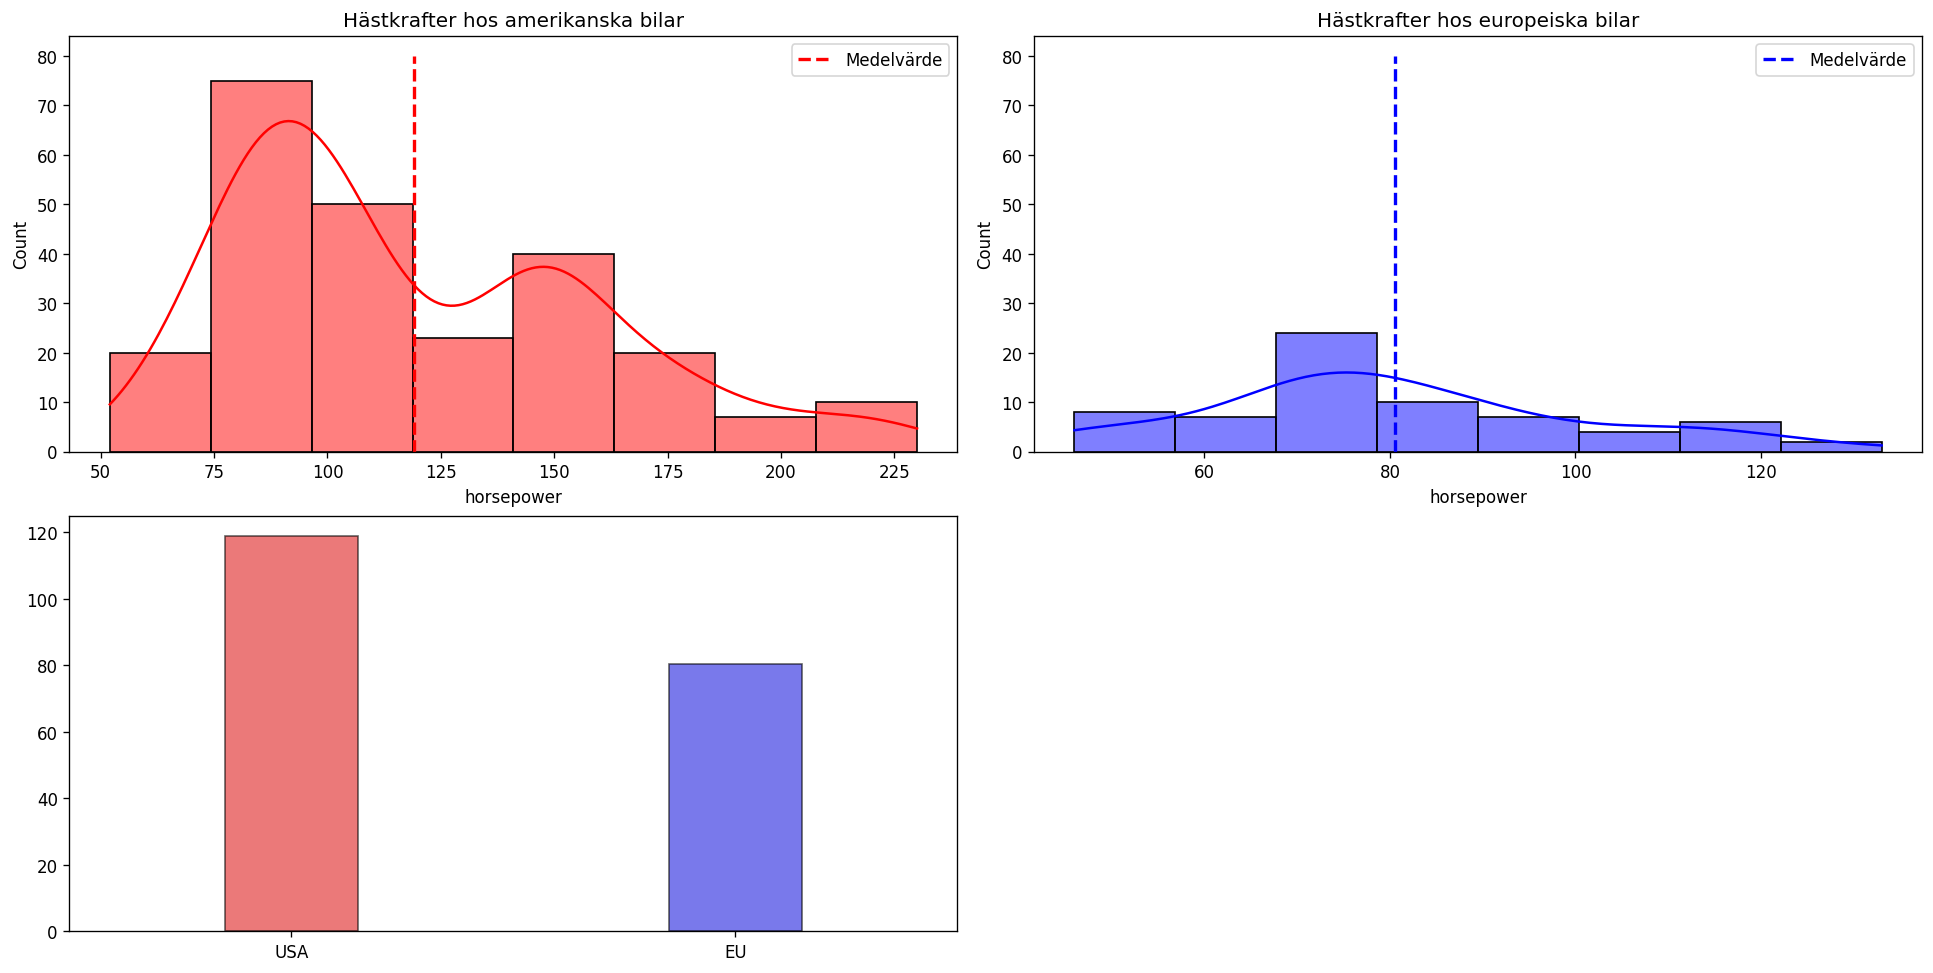

In [138]:
# sorterar datan på vart bilarna kommer ifrån.
usa_cars = df_cars.loc[df_cars["origin"] == "usa"].dropna()
eu_cars = df_cars.loc[df_cars["origin"] == "europe"].dropna()

# beräkna mu för eu och usa.
mu_usa = np.mean(usa_cars["horsepower"])
mu_eu = np.mean(eu_cars["horsepower"])

mu_data = {"x": ["USA", "EU"], "y": [mu_usa, mu_eu]}

# skapar subplots för att bygga ett grid.
fig = plt.figure(figsize=(16, 8), dpi=120, constrained_layout = True)
spec = fig.add_gridspec(2, 2)

ax0 = fig.add_subplot(spec[0, 0])
ax1 = fig.add_subplot(spec[0, 1])
ax2 = fig.add_subplot(spec[1, 0])

sns.histplot(data=usa_cars, x="horsepower", bins=8, ax=ax0, kde=True, multiple="dodge", color="red")
ax0.plot([mu_usa, mu_usa], [0, 80], color='red', linestyle='--', linewidth=2, label='Medelvärde')
ax0.set_title("Hästkrafter hos amerikanska bilar")
ax0.legend(loc='upper right')

sns.histplot(data=eu_cars, x="horsepower", bins=8, ax=ax1, kde=True, color="blue")
ax1.plot([mu_eu, mu_eu], [0, 80], color='blue', linestyle='--', linewidth=2, label='Medelvärde')
ax1.set_title("Hästkrafter hos europeiska bilar")
ax1.legend(loc='upper right')

sns.barplot(data=mu_data, x="x", y="y", ax=ax2, width=0.3, palette=["red", "blue"], edgecolor="black", alpha=0.6)